# Solving Maximum Likelihood Estimation Problems
## Mehmet Gönen
## January 4, 2022

In [1]:
# load libraries
import matplotlib.pyplot as plt

import numpy as np
import scipy.optimize as opt
import scipy.stats as sta

## Maximum likelihood estimation for Gaussian distribution

\begin{align*}
    \mbox{likelihood} = p(x_{1}, x_{2}, \dots, x_{N}) &= p(x_{1}) p(x_{2}) \dots p(x_{N}) \\
    &= \prod\limits_{i = 1}^{N} p(x_{i}) \\
    &= \prod\limits_{i = 1}^{N} \left[ \dfrac{1}{\sqrt{2 \pi \sigma^{2}}} \exp\left(-\dfrac{(x_{i} - \mu)^{2}}{2\sigma^{2}}\right) \right]\\
    \mbox{log-likelihood} &= \log \left(\prod\limits_{i = 1}^{N} \left[ \dfrac{1}{\sqrt{2 \pi \sigma^{2}}} \exp\left(-\dfrac{(x_{i} - \mu)^{2}}{2\sigma^{2}}\right) \right]\right) \\
    &= \sum\limits_{i = 1}^{N} \left[-\dfrac{1}{2}\log(2 \pi \sigma^{2}) -\dfrac{(x_{i} - \mu)^{2}}{2\sigma^{2}}\right]
\end{align*}

In [2]:
np.random.seed(220)
N = 200
mu_truth = 5
sigma_truth = 1

x = np.random.normal(loc = mu_truth, scale = sigma_truth, size = N)
print(x)

[3.67564842 3.53413019 3.75000888 5.65461581 6.235651   3.87761031
 5.4145492  4.8067983  3.25231875 6.68799    4.57934781 6.3208141
 5.28415167 5.10537737 6.06145718 5.50225628 3.81475453 4.92758118
 6.28736726 2.51536976 5.4899738  3.76041667 5.17763824 4.89320615
 3.87359068 3.61549912 4.35837587 3.80788763 5.62443814 3.50013764
 4.06238913 2.80773672 4.06372158 3.79655029 5.30579387 5.38697263
 5.04794036 4.31686531 5.97202699 5.1935349  4.24052185 3.92605724
 4.30194751 6.03050583 5.02678272 6.40637262 4.83401641 5.37283898
 4.31053102 4.26508064 5.39170651 5.31716999 4.80129364 4.66841198
 5.53215201 4.77626236 6.11782582 4.65889803 4.19043546 4.12927772
 5.81668403 6.03666688 4.54741123 7.20309865 5.39039088 3.55094527
 6.70185408 3.8149417  5.41889162 5.41296542 6.38234614 4.81995708
 5.43476586 5.32924893 5.33168049 5.0559792  4.04537302 5.03022868
 6.22650865 6.09077466 4.34197564 4.95155473 5.59271465 5.31542583
 3.54338711 4.9540051  6.71050486 4.20045287 3.52873985 5.47140

In [3]:
def log_likelihood_Gaussian(theta):
    mu = theta[0]
    sigma = theta[1]
    return np.sum(-0.5 * np.log(2 * np.pi * sigma**2) - (x - mu)**2 / (2 * sigma**2))

def negative_log_likelihood_Gaussian(theta):
    return -log_likelihood_Gaussian(theta)

4.9996473915868345 0.9882495398681745


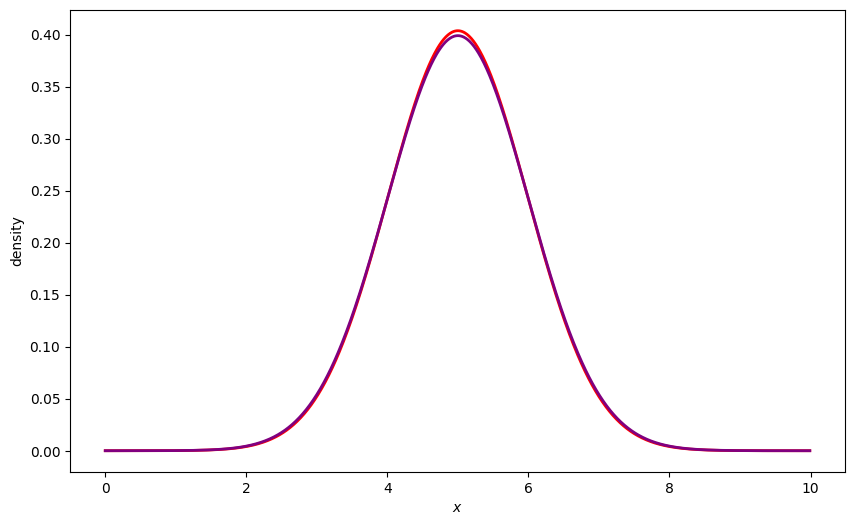

In [4]:
mu_estimate = np.mean(x)
sigma_estimate = np.std(x)
print(mu_estimate, sigma_estimate)

x_range = np.arange(mu_truth - 5 * sigma_truth, mu_truth + 5 * sigma_truth, 0.01)
pdf_estimate = sta.norm.pdf(x_range, loc = mu_estimate, scale = sigma_estimate)
pdf_truth = sta.norm.pdf(x_range, loc = mu_truth, scale = sigma_truth)

plt.figure(figsize = (10, 6))
plt.plot(x_range, pdf_estimate, linewidth = 2, color = "red")
plt.plot(x_range, pdf_truth, linewidth = 2, color = "purple")
plt.xlabel("$x$")
plt.ylabel("density")
plt.show()

In [5]:
res = opt.minimize(fun = negative_log_likelihood_Gaussian, x0 = [0, 2],
                   method = "Powell", bounds = [(-np.infty, +np.infty), (0, +np.infty)],
                   options = {"disp": False})
print(res.x)

[4.99964739 0.9882429 ]


## Sample exam question
Let us assume $X$ is a random variable with the following probability distribution:
\begin{align*}
  p(x) &= 2 \alpha x \exp(-\alpha x^{2})
\end{align*}
where $x$ is a positive real number and $\alpha$ is a positive parameter. You are given a training data set consisting of $N$ examples as $\mathcal{X} = \{x_{i}\}_{i=1}^{N}$ as a <tt>numpy</tt> array, for example, <tt>x = np.array([0.13, 0.90, 0.98, 0.36, 0.26, 0.20, 0.05, 0.05, 0.15, 0.24])</tt>. By assuming the data points are independent from each other, we can write down the likelihood function as follows:
\begin{align*}
	\textrm{likelihood} =& \prod \limits_{i = 1}^{N} p(x_{i}) = \prod \limits_{i = 1}^{N} 2 \alpha x_{i} \exp(-\alpha x_{i}^{2})
\end{align*}
\begin{align*}
	\textrm{log-likelihood} =& \sum \limits_{i = 1}^{N} \left( \log(2) + \log(\alpha) + \log(x_{i}) - \alpha x_{i}^{2} \right)
\end{align*}

Implement your algorithm to maximize the log-likelihood in a single Python script using "Powell" algorithm (<tt>"Powell"</tt> method in <tt>scipy.optimize.minimize</tt> function). Your script should include at least the following function definition that takes the starting point (defined as a <tt>numpy</tt> array, for example, <tt>np.array([10])</tt>) and returns the solution found.

<tt>
def infer_alpha(alpha0):<br/>
&nbsp;&nbsp;&nbsp;&nbsp;#implement your algorithm here<br/>
&nbsp;&nbsp;&nbsp;&nbsp;return(alpha_star)<br/>
</tt>

In [6]:
x = np.array([0.13, 0.90, 0.98, 0.36, 0.26, 0.20, 0.05, 0.05, 0.15, 0.24])

In [7]:
def negative_log_likelihood(alpha):
    return -np.sum(np.log(2) + np.log(alpha) + np.log(x) - alpha * x**2)

In [8]:
def infer_alpha(alpha0):
    res = opt.minimize(fun = negative_log_likelihood, x0 = alpha0,
                       method = "Powell", bounds = [(0, +np.infty)],
                       options = {"disp": False})
    alpha_star = res.x
    return(alpha_star)

alpha_star = infer_alpha(np.array([10]))
print(alpha_star)

[4.74024639]


/var/folders/qp/w763nb2s1h3fhnmyw1n9f3100000gn/T/ipykernel_12500/1348867607.py:2: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(2) + np.log(alpha) + np.log(x) - alpha * x**2)


To maximize log-likelihood, we need to minimize negative log-likelihood with respect to $\alpha$.
\begin{align*}
        \dfrac{\partial \textrm{negative log-likelihood}}{\partial \alpha} &= \sum\limits_{i=1}^{N} \dfrac{\partial (\alpha x_{i}^{2} - \log(2) - \log(\alpha) - \log(x_{i}))}{\partial \alpha} \\
        &= \sum\limits _{i=1}^{N} \left( x_{i}^{2} - \dfrac{1}{\alpha}\right) \\
        \sum\limits _{i=1}^{N} \left( x_{i}^{2} - \dfrac{1}{\alpha}\right) &= 0 \Rightarrow \dfrac{N}{\alpha^{\star}} = \sum \limits_{i=1}^{N} x_{i}^{2} \\
        \alpha^{\star} &= \dfrac{N}{\sum \limits_{i=1}^{N} x_{i}^{2}}
\end{align*}

In [9]:
alpha_estimate = len(x) / np.sum(x**2)
print(alpha_estimate)

def negative_log_likelihood_derivative(alpha):
    return np.sum(x**2 - 1 / alpha)

4.740235115661737


In [10]:
def infer_alpha(alpha0):
    res = opt.minimize(fun = negative_log_likelihood, x0 = alpha0, 
                       method = "L-BFGS-B", bounds = [(0, np.infty)],
                       jac = negative_log_likelihood_derivative, 
                       options = {"disp": False})
    alpha_star = res.x
    return(alpha_star)

alpha_star = infer_alpha(np.array([10]))
print(alpha_star)

[4.74023515]
